In [7]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

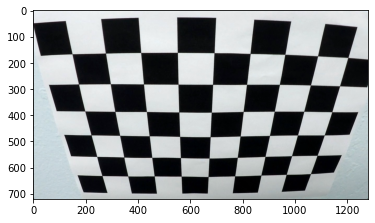

In [8]:
# read and display image
img = cv2.imread('./camera_cal/calibration2.jpg')
plt.imshow(img)

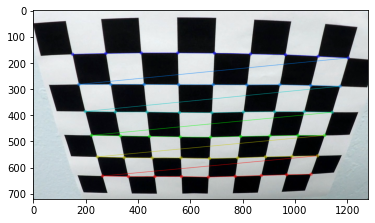

In [9]:
# need to find the transform from real world object coords to image coords
objPoints = [] # 3d points 
imgPoints = [] # 2d points

# we know the objects points because its a calibration image
nx = 9 # interior chessboard corners in the x dim
ny = 6 # interior chessboard corners in the y dim
objPts = np.zeros((nx*ny, 3), np.float32)
objPts[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2) 

# cv2 fn takes gray space img
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

# if the function finds chessboard corners, append known object points and found image points
if ret:
    imgPoints.append(corners)
    objPoints.append(objPts)
    
    # visualize
    cornersImg = cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    plt.imshow(cornersImg)

### Multiple images

percentage found: 85.0


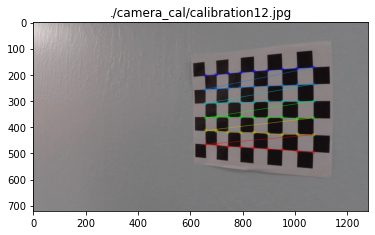

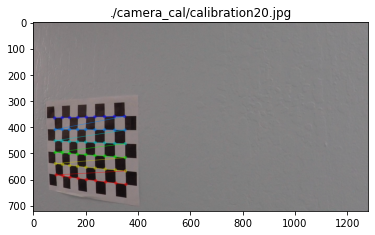

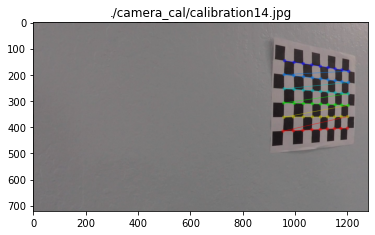

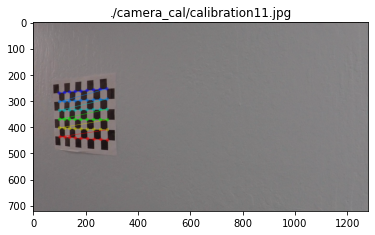

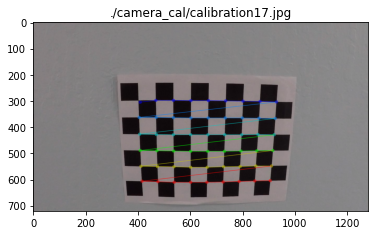

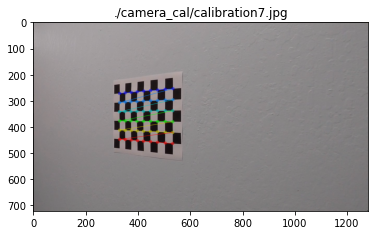

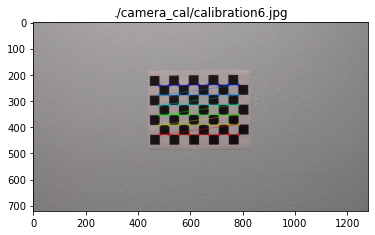

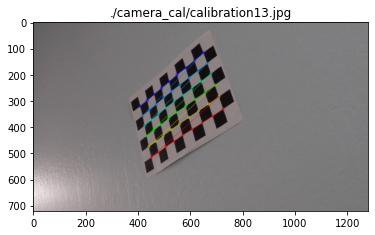

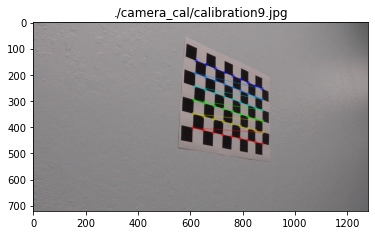

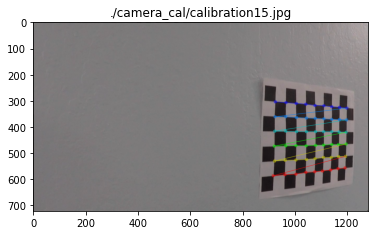

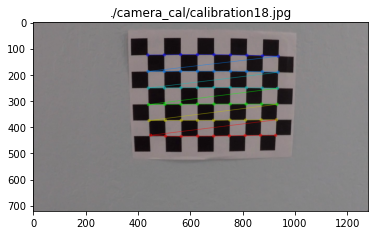

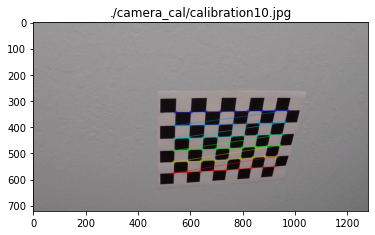

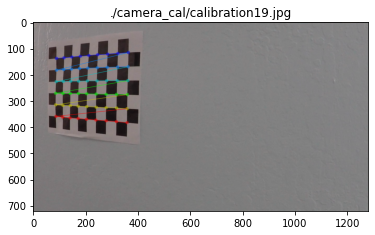

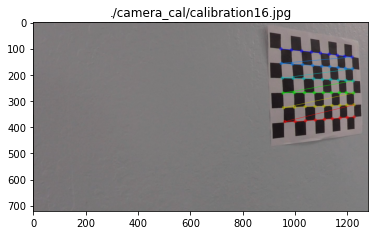

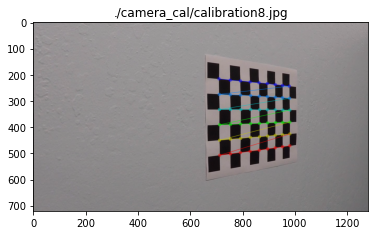

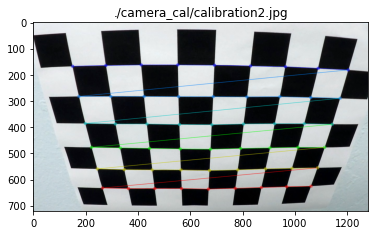

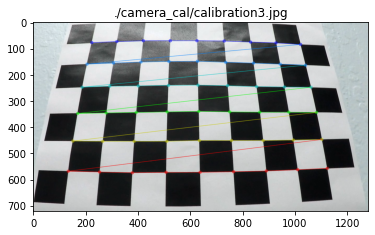

In [10]:
%matplotlib inline
# need to find the transform from real world object coords to image coords

images = glob.glob('./camera_cal/calibration*.jpg')
count = 0

objPoints = [] # 3d points 
imgPoints = [] # 2d points

# we know the objects points because its a calibration image
nx = 9 # interior chessboard corners in the x dim
ny = 6 # interior chessboard corners in the y dim
objPts = np.zeros((nx*ny, 3), np.float32)
objPts[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

for fileName in images:
    img = cv2.imread(fileName)
    # cv2 fn takes gray space img
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    
    # if the function finds chessboard corners, append known object points and found image points
    if ret == True:
        imgPoints.append(corners)
        objPoints.append(objPts)
        count = count + 1

        # visualize
        cornersImg = cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        plt.figure()
        plt.title(fileName)
        plt.imshow(cornersImg)

print('percentage found:', count/np.shape(images)[0] * 100)

### Calibrate Camera

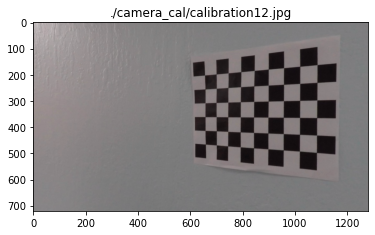

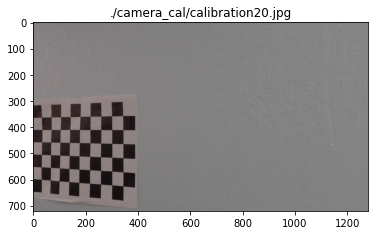

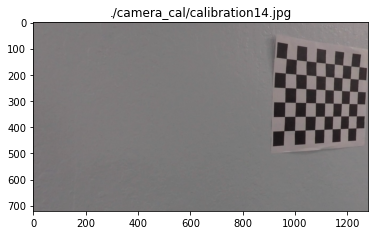

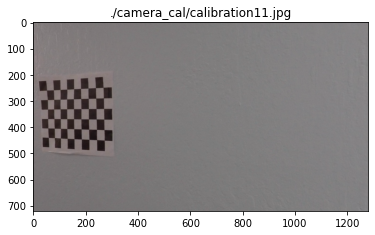

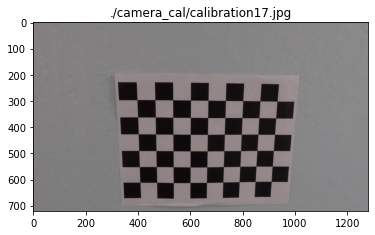

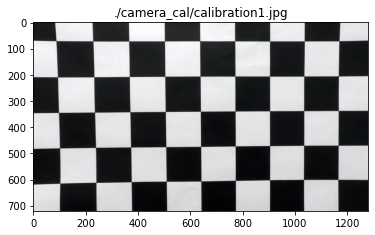

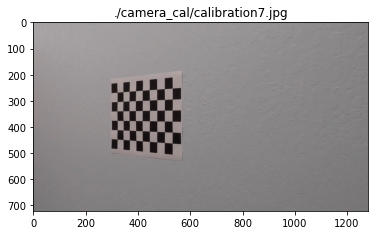

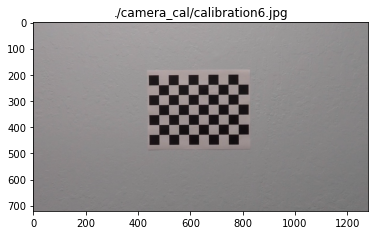

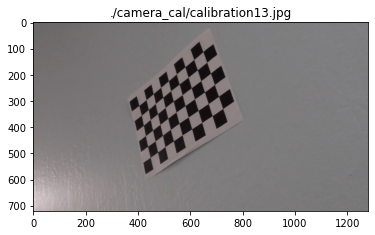

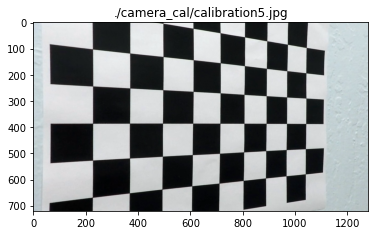

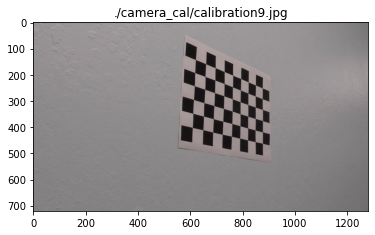

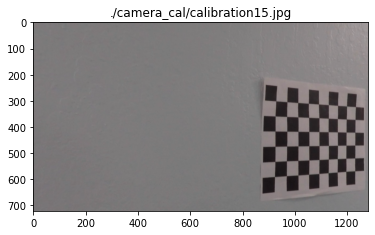

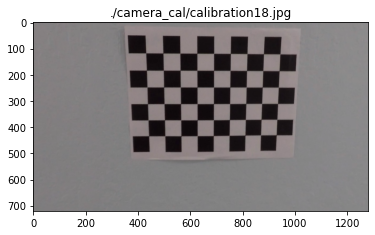

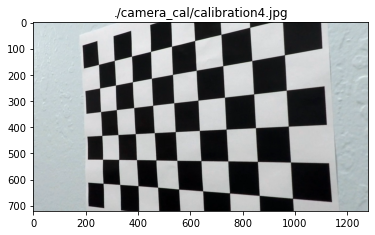

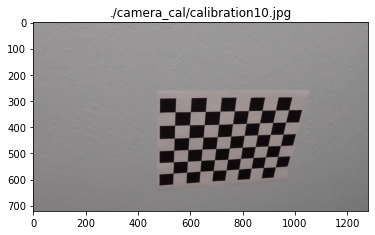

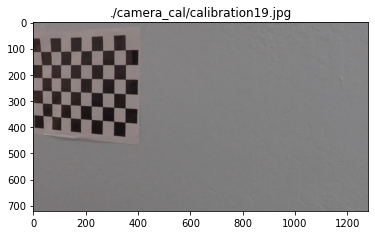

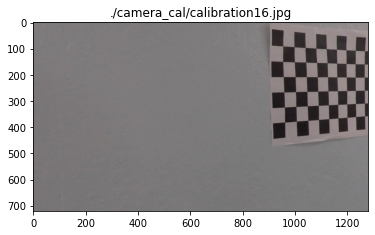

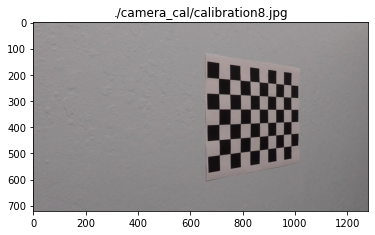

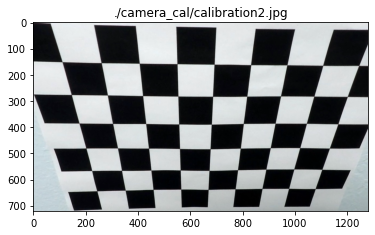

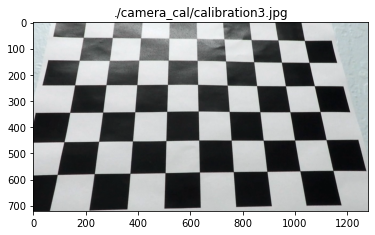

In [14]:
%matplotlib inline

# cameraMtx, camera matrix that discribes the mapping of pinhole camera to convex camera pts
# distortCoeffs, the tangential and radial distortion coefficients
# rotVect, rotational vectors to get camera attitude
# transVects, translational vecotrs to get camera position
ret, cameraMtx, distortCoeffs, rotVects, transVects = \
    cv2.calibrateCamera(objPoints, imgPoints, gray.shape[::-1], None, None)

for fileName in images:
    img = cv2.imread(fileName)
    undistImg = cv2.undistort(img, cameraMtx, distortCoeffs, None, cameraMtx)

    # visualize
    plt.figure()
    plt.title(fileName)
    plt.imshow(undistImg)